In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[documentação tabela SIH](https://drive.google.com/file/d/1DloIP_A7h4SHWEggG5pTOuHbHnj-s3t4/view)

In [6]:
#modo de abrir os arquivos parquet (engine)
!pip install pyarrow 
#biblioteca para manipulação e visualização dos dados em formato "tabelar"
import pandas as pd
# importando numpy para manipulações matemáticas
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

In [7]:
%cd /content/drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/tb_sih_rd/

/content/drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/tb_sih_rd


### QUANTIDADE DE ARQUIVOS PARQUET NO DIRETÓRIO

In [8]:
!ls -1 | wc -l

342


### VERIFICANDO QUAIS ARQUIVOS E QUANTAS LINHAS DE CADA ARQUIVO PARQUET CONTÉM ALGUM DADO ONDE O DIAGNÓSTICO PRINCIPAL FOI 'L20' E SUAS DERIVAÇÕES

In [9]:
%%time

array_arquivos = os.listdir('/content/drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/tb_sih_rd/')
colunas_sih = ['ANO_CMPT','VAL_SH','VAL_SP','VAL_TOT','VAL_UTI','US_TOT','DIAG_PRINC','MORTE','CID_NOTIF','IDADE']
arquivos_com_l20 = []

for arquivo_parquet in array_arquivos:
  df_sih = pd.read_parquet(arquivo_parquet, engine='pyarrow')

  df_sih_custo = df_sih[colunas_sih]

  df_sih_custo = df_sih_custo.astype({'DIAG_PRINC': str,'VAL_TOT': float})

  shape_linhas = df_sih_custo[df_sih_custo['DIAG_PRINC'].str.contains('L20')].shape[0]
  dataframe = df_sih_custo[df_sih_custo['DIAG_PRINC'].str.contains('L20')]

  if shape_linhas != 0:
    arquivos_com_l20.append({arquivo_parquet : shape_linhas})

CPU times: user 10min 46s, sys: 1min 19s, total: 12min 5s
Wall time: 18min 49s


In [10]:
len(arquivos_com_l20) # temos 341 arquivos contendo L20

341

# SALVEI O NOME DO ARQUIVO E QUANTAS LINHAS O DATAFRAME POSSUI:

In [11]:
# OLHANDO OS 3 PRIMEIROS ARQUIVOS, POR EXEMPLO:
arquivos_com_l20[:3]

[{'part-00003-b4b3bdd6-7597-4295-bfbe-ef87752d34ab-c000.snappy.parquet': 14},
 {'part-00000-b4b3bdd6-7597-4295-bfbe-ef87752d34ab-c000.snappy.parquet': 21},
 {'part-00002-b4b3bdd6-7597-4295-bfbe-ef87752d34ab-c000.snappy.parquet': 24}]

### MONTANDO UM ARRAY QUE CONTÉM TODOS OS DF'S COM ESSES DADOS E CONCATENANDO PARA QUE TENHAMOS UMA TABELA ÚNICA SOMENTE DE 'L20'

In [12]:
%%time

array_arquivos = os.listdir('/content/drive/MyDrive/arquivos_pessoais/DATATHON_EINSTEIN/tb_sih_rd/')
colunas_sih = ['ANO_CMPT','VAL_SH','VAL_SP','VAL_TOT','VAL_UTI','US_TOT','DIAG_PRINC','MORTE','CID_NOTIF','IDADE']
#com_l20 = []

df_l20 = []

for arquivo_parquet in array_arquivos:
  df_sih = pd.read_parquet(arquivo_parquet, engine='pyarrow')

  df_sih_custo = df_sih[colunas_sih]

  df_sih_custo = df_sih_custo.astype({'DIAG_PRINC': str,'VAL_TOT': float})

  shape_linhas = df_sih_custo[df_sih_custo['DIAG_PRINC'].str.contains('L20')].shape[0]
  dataframe = df_sih_custo[df_sih_custo['DIAG_PRINC'].str.contains('L20')]

  if shape_linhas != 0:
    #com_l20.append({arquivo_parquet : shape_linhas})
    df_l20.append(dataframe)

CPU times: user 10min 58s, sys: 58.6 s, total: 11min 57s
Wall time: 6min 44s


### QUANTOS DATAFRAMES VOU CONCATENAR?

In [15]:
print(len(df_l20))
DF_L20 = pd.concat(df_l20)

341


### TEMOS 4756 ENTRADAS QUE CONSTAM L20 NESSE GRANDE DATAFRAME

In [16]:
DF_L20.shape

(4756, 10)

In [17]:
DF_L20.head()

,ANO_CMPT,VAL_SH,VAL_SP,VAL_TOT,VAL_UTI,US_TOT,DIAG_PRINC,MORTE,CID_NOTIF,IDADE
9557,2019,311.77,49.59,361.36,0.0,94.34,L209,0,None,1
18697,2019,324.07,49.59,373.66,0.0,97.56,L209,0,None,2
53265,2019,231.85,33.06,264.91,0.0,69.16,L209,0,None,2
53490,2019,202.45,33.06,235.51,0.0,61.49,L200,0,None,17
61407,2019,207.85,33.06,240.91,0.0,62.9,L209,0,None,10


In [18]:
cols_df_l20 = ['ANO_CMPT','VAL_SH','VAL_SP','VAL_TOT','VAL_UTI','US_TOT','DIAG_PRINC','MORTE','IDADE']

### TRANSFORMANDO OS TIPOS DE DADOS DE VALORES EM FLOAT PARA FACILITAR OPERAÇÕES ARITMÉTICAS

In [19]:
DF_L20 = DF_L20.astype({'VAL_SH': float, 'VAL_SP': float, 'VAL_TOT': float, 'VAL_UTI': float, 'US_TOT': float})

In [20]:
DF_L20 = DF_L20[cols_df_l20]

In [21]:
# VAL_TOT É SOMA DE VAL_SH + VAL_SP (posso usar somente val_tot destas..)
# O VALOR DA UTI É NECESSÁRIO SOMAR TAMBÉM? (VOU DESCONSIDERAR ESSE US_TOT, NÃO SEI QUAL A COTAÇÃO DO DÓLAR QUE FOI UTILIZADA) 


DF_L20.groupby(['ANO_CMPT']).sum()

,VAL_SH,VAL_SP,VAL_TOT,VAL_UTI,US_TOT
ANO_CMPT,,,,,
2016,260769.81,40528.71,301298.52,12787.74,89750.43
2017,256409.73,40375.63,296785.36,10926.72,92635.92
2018,284986.34,43265.52,328294.74,8497.27,88914.54
2019,284498.24,41705.30,326203.54,12027.82,82157.62
2020,246474.65,39811.66,286286.31,27062.47,54532.02


### reparem aqui acima que o valor VAL_SH + VAL_SP dá o VAL_TOT, mas sem o VAL_UTI 


In [22]:
cols2_df_l20 = ['ANO_CMPT','VAL_TOT','VAL_UTI','DIAG_PRINC','MORTE','IDADE']
DF_L20 = DF_L20[cols2_df_l20]

In [23]:
DF_L20.shape

(4756, 6)

In [24]:
DF_L20['GASTO_TOTAL_REAIS'] = DF_L20['VAL_TOT'] + DF_L20['VAL_UTI']

In [25]:
DF_L20.columns

Index(['ANO_CMPT', 'VAL_TOT', 'VAL_UTI', 'DIAG_PRINC', 'MORTE', 'IDADE',
       'GASTO_TOTAL_REAIS'],
      dtype='object')

In [26]:
dfl20_custo_anual_sih = DF_L20.drop(['VAL_TOT','VAL_UTI'], axis = 1)

In [27]:
dfl20_custo_anual_sih = dfl20_custo_anual_sih.groupby(['ANO_CMPT']).sum()

In [28]:
import seaborn as sns

ano = ['2016', '2017', '2018', '2019', '2020']
custo = [314086.26,307712.08,336792.01,338231.36,313348.78]

df = pd.DataFrame(list(zip(ano, custo)), columns=["Ano","Custo"])

In [40]:
round(df['Custo'].mean(),2) #322034.1

322034.1

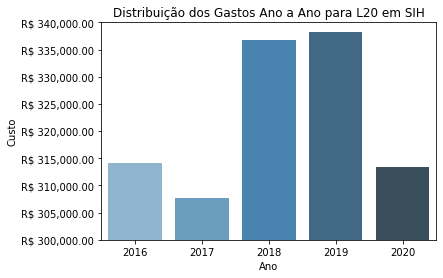

In [31]:
#df é o datatframe que contém os dados, x e y contém o nome das colunas desses dados no df
ax = sns.barplot(x="Ano", y="Custo", data=df,palette="Blues_d")
# limitando eixo y 
ax.set(ylim = (300000, 340000))
# Fazendo com que os labels do eixo y mostrem o R$ e mostrando 2 casas depois da vírgula
ylabels = ['R$ ' + '{:,.2f}'.format(y) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)
ax.set_title("Distribuição dos Gastos Ano a Ano para L20 em SIH")
plt.show()

In [63]:
DF_L20.head()

,ANO_CMPT,VAL_TOT,VAL_UTI,DIAG_PRINC,MORTE,IDADE,GASTO_TOTAL_REAIS
9557,2019,361.36,0.0,L209,0,1,361.36
18697,2019,373.66,0.0,L209,0,2,373.66
53265,2019,264.91,0.0,L209,0,2,264.91
53490,2019,235.51,0.0,L200,0,17,235.51
61407,2019,240.91,0.0,L209,0,10,240.91


In [67]:
DF_L20[['IDADE','GASTO_TOTAL_REAIS','ANO_CMPT']].groupby(['ANO_CMPT']).sum().reset_index()

,ANO_CMPT,GASTO_TOTAL_REAIS
0,2016,314086.26
1,2017,307712.08
2,2018,336792.01
3,2019,338231.36
4,2020,313348.78


In [65]:
dfl20_idade.head()

,IDADE,GASTO_TOTAL_REAIS
0,0,1948.79
1,1,192441.20
2,10,61905.89
3,11,51428.27
4,12,31139.64


In [59]:
idades = [int(idade) for idade in dfl20_idade['IDADE']]
len(idades)

97

In [60]:
dfl20_idade['IDADE'] = idades

In [61]:
dfl20_idade.sort_values(by=['IDADE'])

,IDADE,GASTO_TOTAL_REAIS
0,0,1948.79
1,1,192441.20
12,2,112041.12
23,3,102750.49
34,4,81337.38
...,...,...
92,92,806.79
93,94,224.91
94,95,613.24
95,96,68.22


In [54]:
df0a6 = dfl20_idade.loc[dfl20_idade['IDADE'].isin([0,1,2,3,4,5,6])]

,IDADE,GASTO_TOTAL_REAIS
0,0,1948.79
1,1,192441.20
12,2,112041.12
23,3,102750.49
34,4,81337.38
45,5,83051.45
56,6,85764.31


In [ ]:
# De 0 a 6 anos
# de 6 a 12, 
# de 12 a 18 anos, 
# 18 a 30, 
# 30 a 50, 
# maiores de 50 anos